# Lateral ventricle volume trajectories and response inhibition - lda 
## (R-kernel)

2021, Arvid Lundervold

*Astri J. Lundervold, Alexandra Vik, Arvid Lundervold* <br>
**Lateral ventricle volume trajectories predict response inhibition in older age - a
longitudinal brain imaging and machine learning approach**<br>  (to appear in PLOS ONE) <br>

The linear mixed effect model (LME) was fitted to the data, i.e.

$$\text{Vol}_{ij} = \beta_0 + \beta_1 \text{Age}_{ij} + (b_{0i} + b_{1i} \text{Age}_{ij}) + \epsilon_{ij}$$

Here, $\text{Vol}_{ij}$ the continuous *response variable* in the model is volume of left (right) latreral ventricle in subject $i$ ($i=1,\ldots,N$) at wave $j$ ($j=1,\ldots,n_i$). In our case we have $N=74$ and three wase with complete data, i.e. $n_i=3$ for all $i$. $\text{Age}_{ij}$ is age (in years) of subject $j$ at wave $j$, and a *predictor variable* in the model.

The model parameterrs $\beta_0$ and $\beta_1$ are *fixed effects* parameters.  The variables $b_{0i}$ and $b_{1i}$ 
($i=1,\ldots,N$) are the *random effects* parameters, assumed to be normally distributed witrh zero mean. They denote individual deviations in intercept ($b_{0i}$) and slope ($b_{1i}$), respectiveley, from the group-level fixed effect.
Finally, the random residual errors $\epsilon_{ij}$ are assumed to be independent and normally distributed (i.i.d) with zero mean and constant variance $\sigma_\epsilon^2$.

**Select if eTIV-normalization of lateral ventricle volumes should be used or not**

In [1]:
eTIV_NORMALIZED = FALSE

### Packages and libraries
**`rpy2` should be tested through `0.0-test.ipynb`**

In [2]:
#import numpy as np
#import pandas as pd
#import seaborn as sns
#import math
#from matplotlib import pyplot as plt
##import rpy2
##from rpy2.robjects import r, pandas2ri
##pandas2ri.activate()
##from rpy2.robjects.lib.tidyr import DataFrame

# Enable inline plotting
#%matplotlib inline
#from IPython.display import Image

## Reading data

In [3]:
#fn_data = '../data/01_lvv_ri_renamed_data.csv'
#df = pd.read_csv(fn_data)

In [4]:
#df.head().T

In [5]:
#if eTIV_NORMALIZED:
#    for col in ['left_lvvW1', 'left_lvvW2', 'left_lvvW3',
#                'right_lvvW1', 'right_lvvW2','right_lvvW3']:
#        df[col] = df[col]/df['eTIV']

#df.head().T

 ## Prepare for using lmer in R for linear mixed-effects (LME) analysis
 
  See also `02_lvv_ri_lda.ipynb` (with the R kernel)
  
#### A note on R (tip for previous R users)
It is possible to run R-scripts in Jupyter notebooks (Jupyter = Julia, Python and R).

If you want to continue working with R (not part of this course) you should:

- Be using the latest R version (https://www.r-project.org) and the RStudio Desktop [download] for your Windows, MacOS or Linux system.
- Install the R kernel by opening an R console and then follow the instructions at https://irkernel.github.io/installation
- Necessary (or new) R libraries should be installed via RStudio and the corresponding R environment.
- See also [here](https://datatofish.com/r-jupyter-notebook) and [here](https://developers.refinitiv.com/en/article-catalog/article/setup-jupyter-notebook-r).

The [rpy2](https://github.com/rpy2/rpy2) interface to use R form Python is also possible (but can be a bit more messy).

 **`rpy2` should be tested through `0.0-test.ipynb`**

In [6]:
#%reload_ext rpy2.ipython

In [7]:
#from rpy2.robjects import r, pandas2ri
#pandas2ri.activate()

In [8]:
#import warnings
#warnings.filterwarnings('ignore')

In [9]:
# from rpy2.robjects.packages import importr
# utils = importr('utils')
# If needed to install - uncomment the following ('stringi', needed for 'tidyr' might be  a challenge on MacOS)
#utils.install_packages('tidyr')
#utils.install_packages('lazyeval')
#utils.install_packages('lme4')
#utils.install_packages('ggplot2')
#utils.install_packages('GGally')
#utils.install_packages('foreign')

In [10]:
library(tidyr)
library(dplyr) # Select
library(lme4)
library(ggplot2)
library(GGally)
library(foreign)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [11]:
 #%R R.version$system
# array(['x86_64, linux-gnu'], dtype='<U17')

In [12]:
version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.2                         
year           2020                        
month          06                          
day            22                          
svn rev        78730                       
language       R                           
version.string R version 4.0.2 (2020-06-22)
nickname       Taking Off Again            

In [13]:
# %R R.version$version.string
# array(['R version 3.5.0 (2018-04-23)'], dtype='<U28')

In [14]:
# %R library(rlang); library(Rcpp); library(ggplot2); library(lme4)
#array(['lme4', 'Matrix', 'ggplot2', 'Rcpp', 'rlang', 'lazyeval', 'dplyr',
#       'tidyr', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
#       'datasets', 'methods', 'base'], dtype='<U9')

### Make data frame to long format

In [15]:
if(eTIV_NORMALIZED) {
df <- read.csv(file = '../data/02_lvv_ri_new_eTIV_norm_data_wide.csv')
} else {
df <- read.csv(file = '../data/02_lvv_ri_new_data_wide.csv')  
}
head(df)

,subj,gender,yrW1,yrW2,yrW3,left_lvvW1,left_lvvW2,left_lvvW3,right_lvvW1,right_lvvW2,right_lvvW3,eTIV,RI
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,subj_01,F,56.63,60.35,62.62,5321.4,5063.6,5368.3,6855.2,6729.2,7233.2,1232679,66
2,subj_02,M,49.07,52.58,55.05,11038.6,11912.2,12313.3,10611.6,11774.8,12070.5,1464692,85
3,subj_03,M,74.61,78.14,80.59,29718.4,32265.1,35887.0,34241.0,37155.2,41221.4,1385841,71
4,subj_04,M,56.23,59.78,62.68,21830.1,23933.6,26164.2,15243.9,16505.1,18509.1,1529445,41
5,subj_05,M,63.22,67.00,69.53,17205.1,16970.1,15858.1,13962.1,13755.5,13143.9,1371460,62
6,subj_06,F,60.51,64.29,66.82,14800.4,18814.5,19464.2,12281.2,16135.2,17163.3,1429970,89


In [16]:
#%%R -i df -i eTIV_NORMALIZED

df.all <- df
NOR <- eTIV_NORMALIZED

print(NOR) 
mycols1 = c('subj','yrW1', 'yrW2', 'yrW3')
mycols2 = c('subj','left_lvvW1','left_lvvW2', 'left_lvvW3')
mycols3 = c('subj','right_lvvW1','right_lvvW2', 'right_lvvW3')

#all_of(mycols1) = c('subj','yrW1', 'yrW2', 'yrW3')
#all_of(mycols2) = c('subj','left_lvvW1','left_lvvW2', 'left_lvvW3')
#all_of(mycols3) = c('subj','right_lvvW1','right_lvvW2', 'right_lvvW3')

df.sel1 <- select(df.all, mycols1)
df.sel2 <- select(df.all, mycols2)
df.sel3 <- select(df.all, mycols3)
                  
df.long1 <- gather(df.sel1, Wave, Age, yrW1:yrW3, factor_key=TRUE)
levels(df.long1$Wave)[levels(df.long1$Wave)=="yrW1"] <- "1"
levels(df.long1$Wave)[levels(df.long1$Wave)=="yrW2"] <- "2"
levels(df.long1$Wave)[levels(df.long1$Wave)=="yrW3"] <- "3"

if (NOR) {
df.long2 <- gather(df.sel2, Wave, Volume_eTIVnorm, left_lvvW1:left_lvvW3, factor_key=TRUE)
} else {
df.long2 <- gather(df.sel2, Wave, Volume, left_lvvW1:left_lvvW3, factor_key=TRUE)
}
levels(df.long2$Wave)[levels(df.long2$Wave)=="left_lvvW1"] <- "1"
levels(df.long2$Wave)[levels(df.long2$Wave)=="left_lvvW2"] <- "2"
levels(df.long2$Wave)[levels(df.long2$Wave)=="left_lvvW3"] <- "3"

if (NOR) {
df.long3 <- gather(df.sel3, Wave, Volume_eTIVnorm, right_lvvW1:right_lvvW3, factor_key=TRUE)
} else {
df.long3 <- gather(df.sel3, Wave, Volume, right_lvvW1:right_lvvW3, factor_key=TRUE)
}

levels(df.long3$Wave)[levels(df.long3$Wave)=="right_lvvW1"] <- "1"
levels(df.long3$Wave)[levels(df.long3$Wave)=="right_lvvW2"] <- "2"
levels(df.long3$Wave)[levels(df.long3$Wave)=="right_lvvW3"] <- "3"

df.longL <- merge(x = df.long1, y = df.long2, by.x = c("subj","Wave"), by.y = c("subj","Wave"))
df.longR <- merge(x = df.long1, y = df.long3, by.x = c("subj","Wave"), by.y = c("subj","Wave"))

# Left: Sort by Subject first, then by Wave
df.longL <- df.longL[order(df.longL$subj, df.longL$Wave), ]
df.longL$Region <- "LeftLateralVentricle"
# Reorder columns
df.longL$subj = substr(df.longL$subj, start=6, stop=7)
if (NOR) {
df.longL <- df.longL[c("subj", "Region", "Wave", "Age", "Volume_eTIVnorm")]
} else {
df.longL <- df.longL[c("subj", "Region", "Wave", "Age", "Volume")]   
}
# https://support.rstudio.com/hc/en-us/articles/205175388-Using-the-Data-Viewer
# View(df.long))

# Right: Sort by Subject first, then by Wave
df.longR <- df.longR[order(df.longR$subj, df.longR$Wave), ]
df.longR$Region <- "RightLateralVentricle"
# Reorder columns
df.longR$subj = substr(df.longR$subj, start=6, stop=7)
if (NOR) {
df.longR <- df.longR[c("subj", "Region", "Wave", "Age", "Volume_eTIVnorm")]
} else {
df.longR <- df.longR[c("subj", "Region", "Wave", "Age", "Volume")]   
}

[1] FALSE


Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(mycols1)` instead of `mycols1` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(mycols2)` instead of `mycols2` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(mycols3)` instead of `mycols3` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [17]:
#%R names(df.longR)
print(names(df.longR))
head(df.longR)

[1] "subj"   "Region" "Wave"   "Age"    "Volume"


,subj,Region,Wave,Age,Volume
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,01,RightLateralVentricle,1,56.63,6855.2
2,01,RightLateralVentricle,2,60.35,6729.2
3,01,RightLateralVentricle,3,62.62,7233.2
4,02,RightLateralVentricle,1,49.07,10611.6
5,02,RightLateralVentricle,2,52.58,11774.8
6,02,RightLateralVentricle,3,55.05,12070.5


In [18]:
# Converting the R dataframes to Pandas DataFrames using Rpy2
# https://pandas.pydata.org/pandas-docs/stable/r_interface.html
#from rpy2.robjects import r, pandas2ri
#pandas2ri.activate()

#pd_df_long_L = r['df.longL']
#pd_df_long_R = r['df.longR']

In [19]:
# Save the long formated data to the present repository as .csv
if (eTIV_NORMALIZED) {
write.csv(df.longL, file = '../results/02_lvv_ri_new_left_long_data_eTIV_norm.csv', row.names = FALSE)
write.csv(df.longR, file = '../results/02_lvv_ri_new_right_long_data_eTIV_norm.csv', row.names = FALSE)
} else {
write.csv(df.longL, file = '../results/02_lvv_ri_new_left_long_data.csv', row.names = FALSE)
write.csv(df.longR, file = '../results/02_lvv_ri_new_right_long_data.csv', row.names = FALSE)
}

### Fit linear ordinary least squares (OLS) and mixed-effects (LME) models for Left and Right hemisphere

https://stats.stackexchange.com/questions/242109/model-failed-to-converge-warning-in-lmer

In [20]:
#%%R -i eTIV_NORMALIZED

#library(lme4)

if (eTIV_NORMALIZED) {
lm.1.L <- lm(Volume_eTIVnorm ~ Age, data = df.longL)
lmer.1.L <- lmer(Volume_eTIVnorm ~ Age + (Age | subj), data=df.longL, REML=TRUE)
#                 REML=FALSE, control = lmerControl(optimizer ="Nelder_Mead"))

lm.1.R <- lm(Volume_eTIVnorm ~ Age, data = df.longR)
lmer.1.R <- lmer(Volume_eTIVnorm ~ Age + (Age | subj), data=df.longR, REML=TRUE)
#                 REML=FALSE, control = lmerControl(optimizer ="Nelder_Mead"))
} else {
lm.1.L <- lm(Volume ~ Age, data = df.longL)
lmer.1.L <- lmer(Volume ~ Age + (Age | subj), data=df.longL, REML=TRUE)
#                 REML=FALSE, control = lmerControl(optimizer ="Nelder_Mead"))

lm.1.R <- lm(Volume ~ Age, data = df.longR)
lmer.1.R <- lmer(Volume ~ Age + (Age | subj), data=df.longR, REML=TRUE)
#                 REML=FALSE, control = lmerControl(optimizer ="Nelder_Mead"))
}

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00212958 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”


In [21]:
# %%R

# Left
mylm <- lm.1.L
mylmer <- lmer.1.L

# Get the coefficients of fixed and random effects
a0.L <- coef(mylm)[[1]]
a1.L <- coef(mylm)[[2]]
beta0.L <- fixef(mylmer)[[1]]
beta1.L <- fixef(mylmer)[[2]]
b.L <- ranef(mylmer)
b0i.L <- b.L$subj[,1]
b1i.L <- b.L$subj[,2]

beta01.L = sprintf("Fixed effects (left LV): beta0.L = %.2f ; beta1.L = %.2f", beta0.L, beta1.L)

df.lmer.L <- merge(x = df.sel1, y = df.sel2, by.x = c("subj"), by.y = c("subj"))
df.lmer.L$b0i <- b0i.L
df.lmer.L$b1i <- b1i.L
df.lmer.L$beta0plusb0i <- b0i.L + beta0.L
df.lmer.L$beta1plusb1i <- b1i.L + beta1.L

df.lmer.L$gender <- df.all$gender
df.lmer.L$RI <- df.all$RI
df.lmer.L$RIresid <- df.all$resid12

In [22]:
#%R print(head(df.lmer.L, 10))
head(df.lmer.L, 10)

,subj,yrW1,yrW2,yrW3,left_lvvW1,left_lvvW2,left_lvvW3,b0i,b1i,beta0plusb0i,beta1plusb1i,gender,RI
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,subj_01,56.63,60.35,62.62,5321.4,5063.6,5368.3,15783.972,-403.10601,3726.3505,25.62126,F,66
2,subj_02,49.07,52.58,55.05,11038.6,11912.2,12313.3,11457.990,-192.27953,-599.6311,236.44774,M,85
3,subj_03,74.61,78.14,80.59,29718.4,32265.1,35887.0,-27873.544,504.16412,-39931.1652,932.89138,M,71
4,subj_04,56.23,59.78,62.68,21830.1,23933.6,26164.2,-3973.215,242.65474,-16030.8367,671.38200,M,41
5,subj_05,63.22,67.00,69.53,17205.1,16970.1,15858.1,35796.881,-535.06725,23739.2595,-106.33998,M,62
6,subj_06,60.51,64.29,66.82,14800.4,18814.5,19464.2,-16827.859,300.56470,-28885.4806,729.29197,F,89
7,subj_07,58.87,62.42,64.87,19864.5,20962.8,22141.1,7910.588,-23.87488,-4147.0329,404.85239,M,46
8,subj_08,69.54,73.04,75.47,12080.9,12293.3,12915.2,12966.373,-270.20178,908.7513,158.52549,M,57
9,subj_09,59.33,62.98,65.59,17406.7,20601.1,23556.7,-25494.180,498.48735,-37551.8016,927.21461,M,48


In [23]:
# %R print(beta01.L)
# "Fixed effects (left LV): beta0.L = -12057.62 ; beta1.L = 428.73"
print(beta01.L)

[1] "Fixed effects (left LV): beta0.L = -12057.62 ; beta1.L = 428.73"


In [24]:
# %%R

# Right
mylm <- lm.1.R
mylmer <- lmer.1.R


a0.R <- coef(mylm)[[1]]
a1.R <- coef(mylm)[[2]]
beta0.R <- fixef(mylmer)[[1]]
beta1.R <- fixef(mylmer)[[2]]
b.R <- ranef(mylmer)
b0i.R <- b.R$subj[,1]
b1i.R <- b.R$subj[,2]

beta01.R = sprintf("Fixed effects (right LV): beta0.R = %.2f ; beta1.R = %.2f", beta0.R, beta1.R)

df.lmer.R <- merge(x = df.sel1, y = df.sel3, by.x = c("subj"), by.y = c("subj"))
df.lmer.R$b0i <- b0i.R
df.lmer.R$b1i <- b1i.R
df.lmer.R$beta0plusb0i <- b0i.R + beta0.R
df.lmer.R$beta1plusb1i <- b1i.R + beta1.R

df.lmer.R$Gender <- df.all$gender
df.lmer.R$RI <- df.all$RI 
df.lmer.R$RIresid <- df.all$resid12 

In [25]:
#%R print(beta01.R)
#  "Fixed effects (right LV): beta0.R = -11482.22 ; beta1.R = 408.61"
print(beta01.R)

[1] "Fixed effects (right LV): beta0.R = -11482.22 ; beta1.R = 408.61"


### Plotting lmer model using ggplot

In [26]:
#%%R -i eTIV_NORMALIZED

# Left lateral ventricle

df <-  df.longL

title.1.L <- "Left lateral ventricle"

mytitle <- title.1.L
if (eTIV_NORMALIZED) {
g11 <- ggplot(data = df, aes(x = Age, y = Volume_eTIVnorm, group = subj, colour = factor(subj))) + geom_line(size=2)
} else {
g11 <- ggplot(data = df, aes(x = Age, y = Volume, group = subj, colour = factor(subj))) + geom_line(size=2)
}   
g11 <- g11 + scale_colour_discrete(name  ="subj") + geom_point(pch=19, size = 5)
myX <- scale_x_continuous(limits = c(45, 85), breaks = seq(45, 85, 5), name = "Age [yrs]")
if (eTIV_NORMALIZED) {
myY <- scale_y_continuous(limits = c(0.001, 0.040), breaks = seq(0, 0.035, 0.005), name = "Volume \n(eTIV normalized)")
} else {
myY <- scale_y_continuous(limits = c(500, 65000), breaks = seq(0, 65000, 5000), name = "Volume\n [microL]") 
}
g11 <- g11 + geom_point(size = 1.0) + theme_bw() + myX + myY
g11 <- g11 + labs(title = mytitle, fontsize = 32)
# Set title to twice the base font size
g11 <- g11 + theme(plot.title = element_text(size = rel(2.0)))
g11 <- g11 + theme(axis.line = element_line(size = 1, colour = "black", linetype = "solid"))
g11 <- g11 + theme(axis.text = element_text(size = rel(1.5)))
g11 <- g11 + theme(axis.title.y = element_text(size = rel(1.8), angle = 0))
g11 <- g11 + theme(axis.title.x = element_text(size = rel(1.8), angle = 0))
g11 <- g11 + theme(panel.grid.major = element_line(colour = "gray70"))
g11 <- g11 + theme(panel.grid.minor = element_line(colour = "gray80", linetype = "dotted"))
g11 <- g11 + theme(plot.background = element_rect(fill = "white"))

g11 <- g11 + theme(axis.text.x=element_text(size=24), axis.title.x=element_text(size=24,face="bold"))
g11 <- g11 + theme(axis.text.y=element_text(size=20), axis.title.y=element_text(size=24,face="bold"))
g11 <- g11 + theme(plot.title = element_text(size=28))

if (eTIV_NORMALIZED) {
ggsave("../figures/02_lvv_ri_new_R_left_ventricle_eTIV_norm.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_left_ventricle_eTIV_norm.png", width = 40, height = 30, units = "cm")
} else {
ggsave("../figures/02_lvv_ri_new_R_left_ventricle.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_left_ventricle.png", width = 40, height = 30, units = "cm")
}

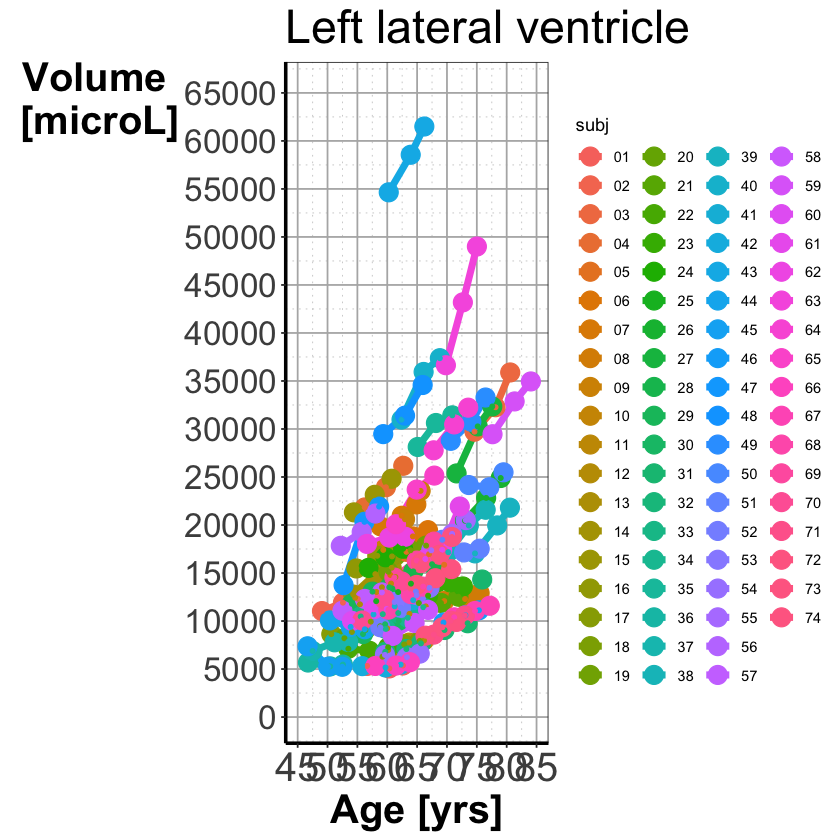

In [27]:
#%R print(g11)
print(g11)

<img src="figs/02_lvv_ri_new_R_left_ventricle.png" width="900">

In [28]:
# Needs a run initialized with
# eTIV_NORMALIZED = True

<img src="figs/02_lvv_ri_new_R_left_ventricle_eTIV_norm.png" width="900">

In [29]:
# %%R -i eTIV_NORMALIZED

# Right lateral ventricle

df <-  df.longR

title.1.R <- "Right lateral ventricle"

mytitle <- title.1.R

if (eTIV_NORMALIZED) {
g12 <- ggplot(data = df, aes(x = Age, y = Volume_eTIVnorm, group = subj, colour = factor(subj))) + geom_line(size=2)
} else {
g12 <- ggplot(data = df, aes(x = Age, y = Volume, group = subj, colour = factor(subj))) + geom_line(size=2)
}
g12 <- g12 + scale_colour_discrete(name  ="subj") + geom_point(pch=19, size = 5)
myX <- scale_x_continuous(limits = c(45, 85), breaks = seq(45, 85, 5), name = "Age [yrs]")

if (eTIV_NORMALIZED) {
myY <- scale_y_continuous(limits = c(0.001, 0.040), breaks = seq(0, 0.035, 0.005), name = "Volume \n(eTIV normalized)")
} else {
myY <- scale_y_continuous(limits = c(500, 65000), breaks = seq(0, 65000, 5000), name = "Volume\n [microL]") 
}
 
g12 <- g12 + geom_point(size = 1.0) + theme_bw() + myX + myY
g12 <- g12 + labs(title = mytitle, fontsize = 32)
# Set title to twice the base font size
g12 <- g12 + theme(plot.title = element_text(size = rel(2.0)))
g12 <- g12 + theme(axis.line = element_line(size = 1, colour = "black", linetype = "solid"))
g12 <- g12 + theme(axis.text = element_text(size = rel(1.5)))
g12 <- g12 + theme(axis.title.y = element_text(size = rel(1.8), angle = 0))
g12 <- g12 + theme(axis.title.x = element_text(size = rel(1.8), angle = 0))
g12 <- g12 + theme(panel.grid.major = element_line(colour = "gray70"))
g12 <- g12 + theme(panel.grid.minor = element_line(colour = "gray80", linetype = "dotted"))
g12 <- g12 + theme(plot.background = element_rect(fill = "white"))

g12 <- g12 + theme(axis.text.x=element_text(size=24), axis.title.x=element_text(size=24,face="bold"))
g12 <- g12 + theme(axis.text.y=element_text(size=20), axis.title.y=element_text(size=24,face="bold"))
g12 <- g12 + theme(plot.title = element_text(size=28))

if (eTIV_NORMALIZED) {
ggsave("../figures/02_lvv_ri_new_R_right_ventricle_eTIV_norm.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_right_ventricle_eTIV_norm.png", width = 40, height = 30, units = "cm")
} else {
ggsave("../figures/02_lvv_ri_new_R_right_ventricle.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_right_ventricle.png", width = 40, height = 30, units = "cm")
}

In [30]:
# %R plot(g12)
#Image(filename='../figures/02_lvv_ri_rpy2_right_ventricle.png', width=900)

<img src="figs/02_lvv_ri_new_R_right_ventricle.png" width="900">

In [31]:
# Needs a run initialized with
# eTIV_NORMALIZED = True

#Image(filename='../figures/02_lvv_ri_rpy2_right_ventricle_eTIV_norm.png', width=900)

<img src="figs/02_lvv_ri_new_R_right_ventricle_eTIV_norm.png" width="900">

In [32]:
#%%R -i eTIV_NORMALIZED

df <-  df.longL
mylm <- lm.1.L
mylmer <- lmer.1.L
mytitle <- title.1.L

if (eTIV_NORMALIZED) {
g21 <- ggplot(data = df, aes(x = Age, y = Volume_eTIVnorm, group = subj, colour = factor(subj))) + geom_line(size=1)
} else {
g21 <- ggplot(data = df, aes(x = Age, y = Volume, group = subj, colour = factor(subj))) + geom_line(size=1)
}
    
    
g21 <- g21 + scale_colour_discrete(name  ="subj") + geom_point(pch=19, size = 4)
myX <- scale_x_continuous(limits = c(45, 85), breaks = seq(45, 85, 5), name = "Age [yrs]")
if (eTIV_NORMALIZED) {
myY <- scale_y_continuous(limits = c(0.001, 0.040), breaks = seq(0, 0.035, 0.005), name = "Volume \n(eTIV normalized)")
} else {
myY <- scale_y_continuous(limits = c(500, 65000), breaks = seq(0, 65000, 5000), name = "Volume\n [microL]")
}

g21 <- g21 + geom_point(size = 4.0) + theme_bw() + myX + myY
g21 <- g21 + geom_abline(intercept = a0.L, slope = a1.L, linetype = "dashed", size=2.0, colour = "red")
g21 <- g21 + geom_abline(intercept = beta0.L, slope = beta1.L, linetype = "solid", size=2.0, colour = "black")
g21 <- g21 + labs(title = mytitle, fontsize = 32)
# Set title to twice the base font size
g21 <- g21 + theme(plot.title = element_text(size = rel(1.7)))
g21 <- g21 + theme(axis.line = element_line(size = 1, colour = "black", linetype = "solid"))
g21 <- g21 + theme(axis.text = element_text(size = rel(1.2)))
g21 <- g21 + theme(axis.title.y = element_text(size = rel(1.5), angle = 0))
g21 <- g21 + theme(axis.title.x = element_text(size = rel(1.5), angle = 0))
g21 <- g21 + theme(legend.position="none")
g21 <- g21 + theme(panel.grid.major = element_line(colour = "gray70"))
g21 <- g21 + theme(panel.grid.minor = element_line(colour = "gray80", linetype = "dotted"))
g21 <- g21 + theme(plot.background = element_rect(fill = "white"))

g21 <- g21 + theme(axis.text.x=element_text(size=24), axis.title.x=element_text(size=24,face="bold"))
g21 <- g21 + theme(axis.text.y=element_text(size=20), axis.title.y=element_text(size=24,face="bold"))
g21 <- g21 + theme(plot.title = element_text(size=28))

# Focus on individual trajectories; first fit a simple linear model to each trajectory
n <- length(b0i.L)
for (i in 1:n) {
  myx <-  df$Age[df$Wave==1][i]
  myxend <- df$Age[df$Wave==3][i]
  myy <- (beta0.L + b0i.L[i]) + (beta1.L + b1i.L[i])*myx
  myyend <- (beta0.L + b0i.L[i]) + (beta1.L + b1i.L[i])*myxend
  g21 <- g21 + annotate("segment", x = myx, xend = myxend, y = myy, yend = myyend, colour = "black", size = 0.3)
}

if (eTIV_NORMALIZED) {
ggsave("../figures/02_lvv_ri_new_R_lmer_left_ventricle_eTIV_norm.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_lmer_left_ventricle_eTIV_norm.png", width = 40, height = 30, units = "cm")
} else {
ggsave("../figures/02_lvv_ri_new_R_lmer_left_ventricle.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_lmer_left_ventricle.png", width = 40, height = 30, units = "cm")
}

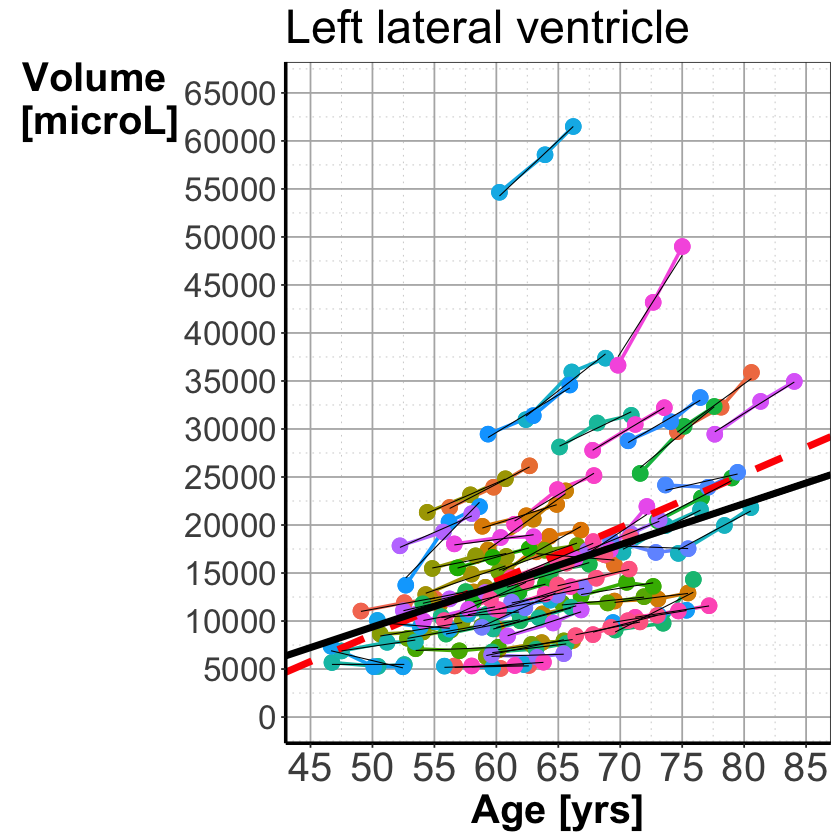

In [33]:
print(g21)

In [34]:
# %R print(g21)
#Image(filename='../figures/02_lvv_ri_rpy2_lmer_left_ventricle.png', width=900)

<img src="./figs/02_lvv_ri_new_R_lmer_left_ventricle.png" width="900">

In [35]:
# Needs a run initialized with
# eTIV_NORMALIZED = True

#Image(filename='../figures/02_lvv_ri_rpy2_lmer_left_ventricle_eTIV_norm.png', width=900)

<img src="./figs/02_lvv_ri_new_R_lmer_left_ventricle_eTIV_norm.png" width="900">

In [36]:
# %%R -i eTIV_NORMALIZED


df <-  df.longR
mylm <- lm.1.R
mylmer <- lmer.1.R
mytitle <- title.1.R

if (eTIV_NORMALIZED) {
g22 <- ggplot(data = df, aes(x = Age, y = Volume_eTIVnorm, group = subj, colour = factor(subj))) + geom_line(size=1)
} else {
g22 <- ggplot(data = df, aes(x = Age, y = Volume, group = subj, colour = factor(subj))) + geom_line(size=1)
}

g22 <- g22 + scale_colour_discrete(name  ="subj") + geom_point(pch=19, size = 4)
myX <- scale_x_continuous(limits = c(45, 85), breaks = seq(45, 85, 5), name = "Age [yrs]")

if (eTIV_NORMALIZED) {
myY <- scale_y_continuous(limits = c(0.001, 0.040), breaks = seq(0, 0.035, 0.005), name = "Volume \n(eTIV normalized)")
} else {
myY <- scale_y_continuous(limits = c(500, 65000), breaks = seq(0, 65000, 5000), name = "Volume\n [microL]")
}

g22 <- g22 + geom_point(size = 1.0) + theme_bw() + myX + myY
g22 <- g22 + geom_abline(intercept = a0.R, slope = a1.R, linetype = "dashed", size=2.0, colour = "red")
g22 <- g22 + geom_abline(intercept = beta0.R, slope = beta1.R, linetype = "solid", size=2.0, colour = "black")
g22 <- g22 + labs(title = mytitle, fontsize = 32)
# Set title to twice the base font size
g22 <- g22 + theme(plot.title = element_text(size = rel(1.7)))
g22 <- g22 + theme(axis.line = element_line(size = 1, colour = "black", linetype = "solid"))
g22 <- g22 + theme(axis.text = element_text(size = rel(1.2)))
g22 <- g22 + theme(axis.title.y = element_text(size = rel(1.5), angle = 0))
g22 <- g22 + theme(axis.title.x = element_text(size = rel(1.5), angle = 0))
g22 <- g22 + theme(legend.position="none")
g22 <- g22 + theme(panel.grid.major = element_line(colour = "gray70"))
g22 <- g22 + theme(panel.grid.minor = element_line(colour = "gray80", linetype = "dotted"))
g22 <- g22 + theme(plot.background = element_rect(fill = "white"))

g22 <- g22 + theme(axis.text.x=element_text(size=24), axis.title.x=element_text(size=24,face="bold"))
g22 <- g22 + theme(axis.text.y=element_text(size=20), axis.title.y=element_text(size=24,face="bold"))
g22 <- g22 + theme(plot.title = element_text(size=28))


# Focus on individual trajectories; first fit a simple linear model to each trajectory
n <- length(b0i.R)
for (i in 1:n) {
  myx <-  df$Age[df$Wave==1][i]
  myxend <- df$Age[df$Wave==3][i]
  myy <- (beta0.R + b0i.R[i]) + (beta1.R + b1i.R[i])*myx
  myyend <- (beta0.R + b0i.R[i]) + (beta1.R + b1i.R[i])*myxend
  g22 <- g22 + annotate("segment", x = myx, xend = myxend, y = myy, yend = myyend, colour = "black", size = 0.3)
}
  
if (eTIV_NORMALIZED) {
ggsave("../figures/02_lvv_ri_new_R_lmer_right_ventricle_eTIV_norm.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_lmer_right_ventricle_eTIV_norm.png", width = 40, height = 30, units = "cm")
} else {
ggsave("../figures/02_lvv_ri_new_R_lmer_right_ventricle.pdf", width = 40, height = 30, units = "cm")
ggsave("./figs/02_lvv_ri_new_R_lmer_right_ventricle.png", width = 40, height = 30, units = "cm")
}

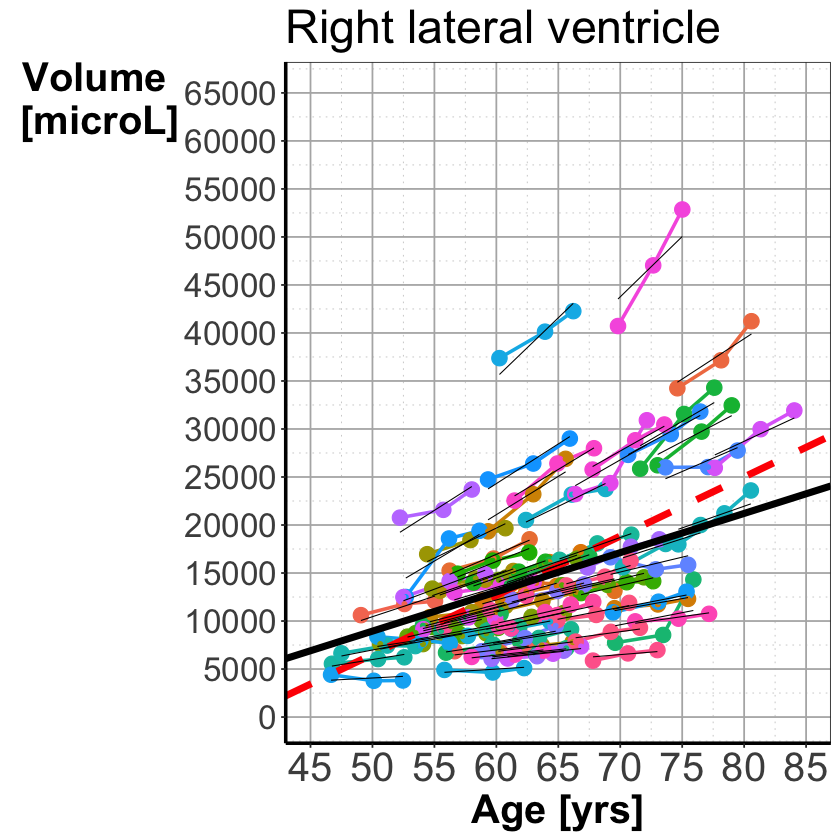

In [37]:
print(g22)

In [38]:
# %R print(g21)
#Image(filename='../figures/02_lvv_ri_rpy2_lmer_right_ventricle.png', width=900)

<img src="./figs/02_lvv_ri_new_R_lmer_right_ventricle.png" width="900">

In [39]:
# Needs a run initialized with
# eTIV_NORMALIZED = True

#Image(filename='../figures/02_lvv_ri_rpy2_lmer_right_ventricle_eTIV_norm.png', width=900)

<img src="./figs/02_lvv_ri_new_R_lmer_right_ventricle_eTIV_norm.png" width="900">

In [40]:
# %R 
names(df.lmer.L)

[1] "subj"         "yrW1"         "yrW2"         "yrW3"         "left_lvvW1"  
 [6] "left_lvvW2"   "left_lvvW3"   "b0i"          "b1i"          "beta0plusb0i"
[11] "beta1plusb1i" "gender"       "RI"

In [41]:
# %%R 
x <- as.integer(substring(df.lmer.L$subj,6, 7))
y <- df.lmer.L$gender
df.lmer <- data.frame(x,y)
x_name <- "id"
y_name <- "Gender"
names(df.lmer) <- c(x_name,y_name)

df.lmer$Age1 = df.lmer.L$yrW1
df.lmer$Age2 = df.lmer.L$yrW2
df.lmer$Age3 = df.lmer.L$yrW3

df.lmer$b0iL = df.lmer.L$b0i
df.lmer$b1iL = df.lmer.L$b1i
df.lmer$beta0plusb0iL = df.lmer.L$beta0plusb0i
df.lmer$beta1plusb1iL = df.lmer.L$beta1plusb1i

df.lmer$b0iR = df.lmer.R$b0i
df.lmer$b1iR = df.lmer.R$b1i
df.lmer$beta0plusb0iR = df.lmer.R$beta0plusb0i
df.lmer$beta1plusb1iR = df.lmer.R$beta1plusb1i

df.lmer$LatVentL1 = df.lmer.L$left_lvvW1
df.lmer$LatVentL2 = df.lmer.L$left_lvvW2
df.lmer$LatVentL3 = df.lmer.L$left_lvvW3

df.lmer$LatVentR1 = df.lmer.R$right_lvvW1
df.lmer$LatVentR2 = df.lmer.R$right_lvvW2
df.lmer$LatVentR3 = df.lmer.R$right_lvvW3

df.lmer$RI3 = df.lmer.L$RI   # Response Inhibition, wave 3
df.lmer$RI3resid = df.lmer.L$RIresid   # Response Inhibition residuals (full model12 from 01_)

In [42]:
#%R 
print(colnames(df.lmer))

 [1] "id"            "Gender"        "Age1"          "Age2"         
 [5] "Age3"          "b0iL"          "b1iL"          "beta0plusb0iL"
 [9] "beta1plusb1iL" "b0iR"          "b1iR"          "beta0plusb0iR"
[13] "beta1plusb1iR" "LatVentL1"     "LatVentL2"     "LatVentL3"    
[17] "LatVentR1"     "LatVentR2"     "LatVentR3"     "RI3"          


In [43]:
head(df.lmer)

,id,Gender,Age1,Age2,Age3,b0iL,b1iL,beta0plusb0iL,beta1plusb1iL,b0iR,b1iR,beta0plusb0iR,beta1plusb1iR,LatVentL1,LatVentL2,LatVentL3,LatVentR1,LatVentR2,LatVentR3,RI3
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,F,56.63,60.35,62.62,15783.972,-403.1060,3726.3505,25.62126,9303.7517,-255.83748,-2178.473,152.7701,5321.4,5063.6,5368.3,6855.2,6729.2,7233.2,66
2,2,M,49.07,52.58,55.05,11457.990,-192.2795,-599.6311,236.44774,579.8084,18.44521,-10902.416,427.0528,11038.6,11912.2,12313.3,10611.6,11774.8,12070.5,85
3,3,M,74.61,78.14,80.59,-27873.544,504.1641,-39931.1652,932.89138,-16362.8828,431.94848,-27845.107,840.5560,29718.4,32265.1,35887.0,34241.0,37155.2,41221.4,71
4,4,M,56.23,59.78,62.68,-3973.215,242.6547,-16030.8367,671.38200,-4710.9595,143.70012,-16193.184,552.3077,21830.1,23933.6,26164.2,15243.9,16505.1,18509.1,41
5,5,M,63.22,67.00,69.53,35796.881,-535.0672,23739.2595,-106.33998,5763.1296,-119.31520,-5719.095,289.2923,17205.1,16970.1,15858.1,13962.1,13755.5,13143.9,62
6,6,F,60.51,64.29,66.82,-16827.859,300.5647,-28885.4806,729.29197,-3680.7894,67.74603,-15163.014,476.3536,14800.4,18814.5,19464.2,12281.2,16135.2,17163.3,89


In [44]:
# Save the long formated data and feature vectors to the present repository as .csv
if (eTIV_NORMALIZED) {
write.csv(df.lmer, file = '../results/02_lvv_ri_new_R_long_data_and_features_eTIV_norm.csv', row.names = FALSE)
} else {
write.csv(df.lmer, file = '../results/02_lvv_ri_new_R_long_data_and_features.csv', row.names = FALSE)
}

# END